Data Produksi Padi

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro

Matplotlib is building the font cache; this may take a moment.


In [3]:
# Membaca data dari file Excel
file_path = r"C:\Users\DELL\Downloads\Statistika\Data_Tanaman_Padi_Sumatera_version_1.xlsx"

# Load data
data = pd.read_excel(file_path)

data

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.00,323589.00,1627.0,82.00,26.06
1,Aceh,1994,1299699.00,329041.00,1521.0,82.12,26.92
2,Aceh,1995,1382905.00,339253.00,1476.0,82.72,26.27
3,Aceh,1996,1419128.00,348223.00,1557.0,83.00,26.08
4,Aceh,1997,1368074.00,337561.00,1339.0,82.46,26.31
...,...,...,...,...,...,...,...
219,Lampung,2016,3831923.00,390799.00,2317.6,79.40,26.45
220,Lampung,2017,4090654.00,396559.00,1825.1,77.04,26.36
221,Lampung,2018,2488641.91,511940.93,1385.8,76.05,25.50
222,Lampung,2019,2164089.33,464103.42,1706.4,78.03,27.23


In [5]:
# Menghapus kolom Provinsi dan Tahun
data = data.drop(columns=["Provinsi","Tahun"])

# Memeriksa data
data.head()

,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,1329536.0,323589.0,1627.0,82.00,26.06
1,1299699.0,329041.0,1521.0,82.12,26.92
2,1382905.0,339253.0,1476.0,82.72,26.27
3,1419128.0,348223.0,1557.0,83.00,26.08
4,1368074.0,337561.0,1339.0,82.46,26.31


In [6]:
# Variabel independen (X) dan dependen (Y)
X = data.drop(columns=["Produksi"])  # Semua kolom kecuali Produksi
Y = data["Produksi"]  # Kolom Produksi sebagai variabel dependen

EDA (Exploratory Data Analysis)

In [7]:
# Memeriksa struktur dataset
print(data.info())

# Memeriksa statistik deskriptif
print(data.describe())

# Memeriksa nilai yang hilang
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Produksi        224 non-null    float64
 1   Luas Panen      224 non-null    float64
 2   Curah hujan     224 non-null    float64
 3   Kelembapan      224 non-null    float64
 4   Suhu rata-rata  224 non-null    float64
dtypes: float64(5)
memory usage: 8.9 KB
None
           Produksi     Luas Panen  Curah hujan  Kelembapan  Suhu rata-rata
count  2.240000e+02     224.000000   224.000000  224.000000      224.000000
mean   1.679701e+06  374349.966920  2452.490759   80.948705       26.801964
std    1.161387e+06  232751.161987  1031.972625    4.878680        1.197041
min    4.293800e+04   63142.040000   222.500000   54.200000       22.190000
25%    5.488570e+05  146919.500000  1703.525000   78.975000       26.177500
50%    1.667773e+06  373551.500000  2315.700000   82.375000       26.730000
75% 

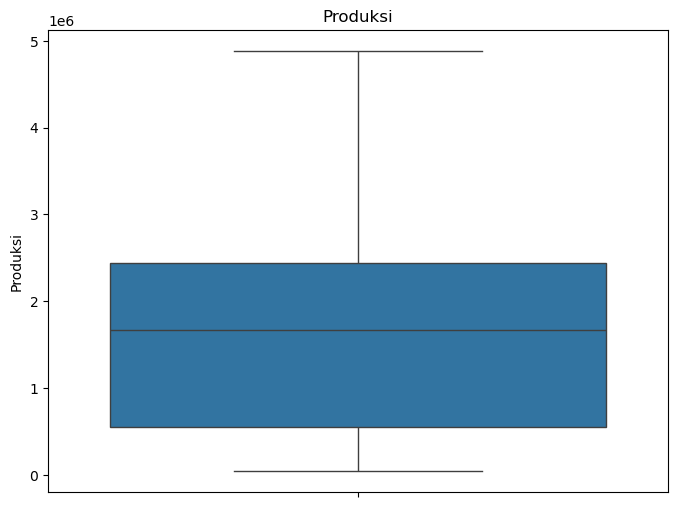

In [8]:
# Boxplot untuk kolom 'Produksi'
plt.figure(figsize=(8, 6))
sns.boxplot(data=data['Produksi'])
plt.title('Produksi')
plt.show()

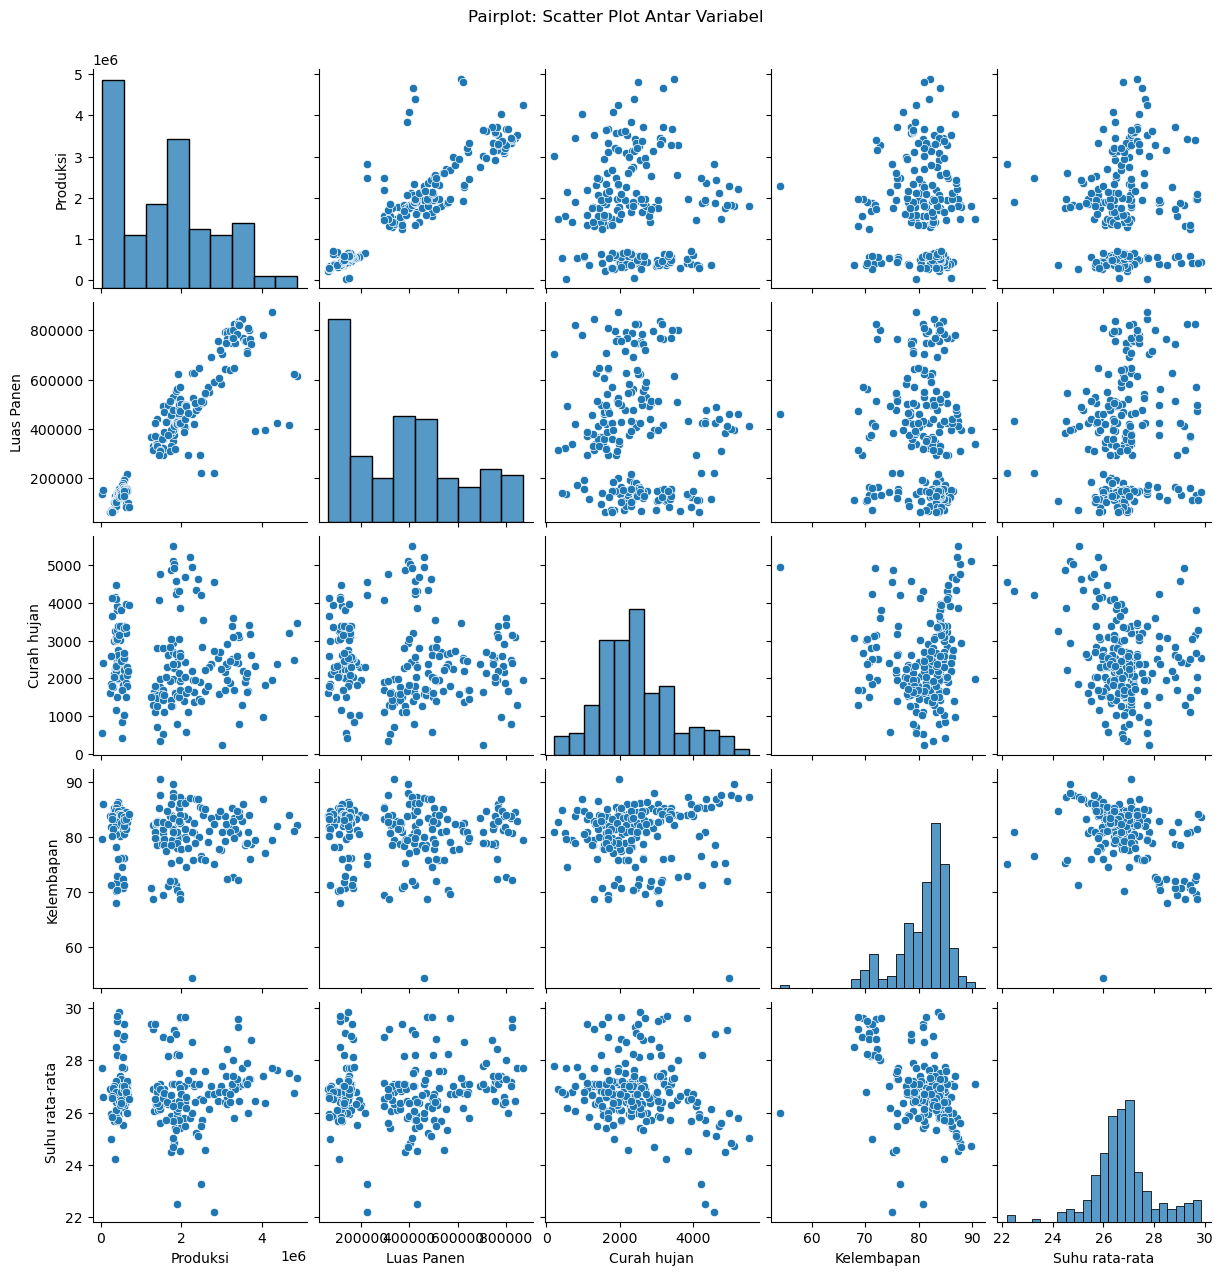

In [9]:
# Membuat pairplot untuk semua pasangan variabel numerik
sns.pairplot(data)
plt.suptitle('Pairplot: Scatter Plot Antar Variabel', y=1.02)  # Menambahkan judul
plt.show()

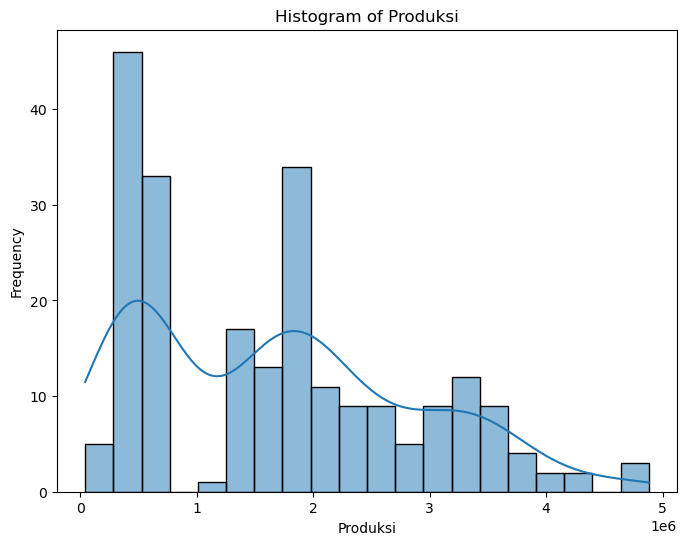

In [10]:
# Histogram untuk kolom 'Produksi'
plt.figure(figsize=(8, 6))
sns.histplot(data['Produksi'], bins=20, kde=True)
plt.title('Histogram of Produksi')
plt.xlabel('Produksi')
plt.ylabel('Frequency')
plt.show()

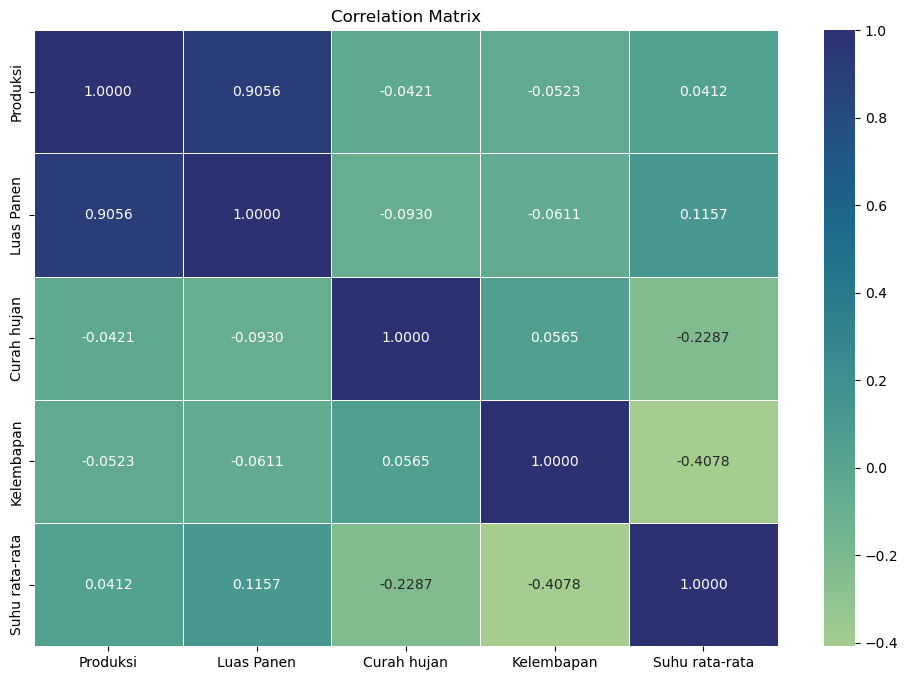

In [11]:
# Menghitung korelasi antar variabel
correlation_matrix = data.corr()

# Plot heatmap untuk korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt='.4f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [12]:
correlation_matrix

,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
Produksi,1.000000,0.905622,-0.042129,-0.052316,0.041160
Luas Panen,0.905622,1.000000,-0.092975,-0.061121,0.115726
Curah hujan,-0.042129,-0.092975,1.000000,0.056466,-0.228699
Kelembapan,-0.052316,-0.061121,0.056466,1.000000,-0.407799
Suhu rata-rata,0.041160,0.115726,-0.228699,-0.407799,1.000000


Membangun Model

In [13]:
# Menambahkan konstanta (intercept) ke model
X = sm.add_constant(X)

X

,const,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,1.0,323589.00,1627.0,82.00,26.06
1,1.0,329041.00,1521.0,82.12,26.92
2,1.0,339253.00,1476.0,82.72,26.27
3,1.0,348223.00,1557.0,83.00,26.08
4,1.0,337561.00,1339.0,82.46,26.31
...,...,...,...,...,...
219,1.0,390799.00,2317.6,79.40,26.45
220,1.0,396559.00,1825.1,77.04,26.36
221,1.0,511940.93,1385.8,76.05,25.50
222,1.0,464103.42,1706.4,78.03,27.23


In [16]:
# Membuat model regresi linier
model = sm.OLS(Y, X)

# Melatih model
results = model.fit()

In [17]:
# Menampilkan summary model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Produksi   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     259.3
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           7.86e-82
Time:                        01:19:03   Log-Likelihood:                -3249.9
No. Observations:                 224   AIC:                             6510.
Df Residuals:                     219   BIC:                             6527.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.183e+06   1.21e+06      1.

Uji Asumsi

In [18]:
# Menghitung VIF untuk masing-masing variabel independen
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Variance Inflation Factor (VIF):
         Variable          VIF
0           const  1380.911782
1      Luas Panen     1.018732
2     Curah hujan     1.062129
3      Kelembapan     1.201933
4  Suhu rata-rata     1.272314


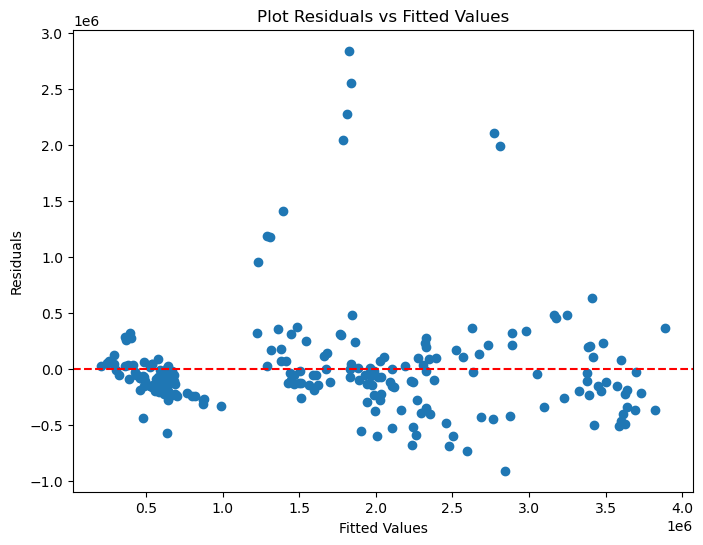

In [19]:
# Plot residuals vs prediksi untuk memeriksa linieritas
fitted_values = results.fittedvalues
residuals = results.resid

plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Plot Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [21]:
from statsmodels.stats.stattools import durbin_watson

# Uji Durbin-Watson untuk menguji autokorelasi residual
dw_statistic = durbin_watson(residuals)
print(f'Durbin-Watson Statistic: {dw_statistic}')

Durbin-Watson Statistic: 0.6397102727032362


In [22]:
# Uji Breusch-Pagan untuk homoscedasticity
bp_test = het_breuschpagan(residuals, X)
bp_test_result = pd.Series(bp_test[:2], index=["LM Statistic", "p-value"])
print("Hasil Uji Breusch-Pagan (Homoscedasticity):")
print(bp_test_result)

Hasil Uji Breusch-Pagan (Homoscedasticity):
LM Statistic    2.374451
p-value         0.667249
dtype: float64


Text(0, 0.5, 'Frequency')

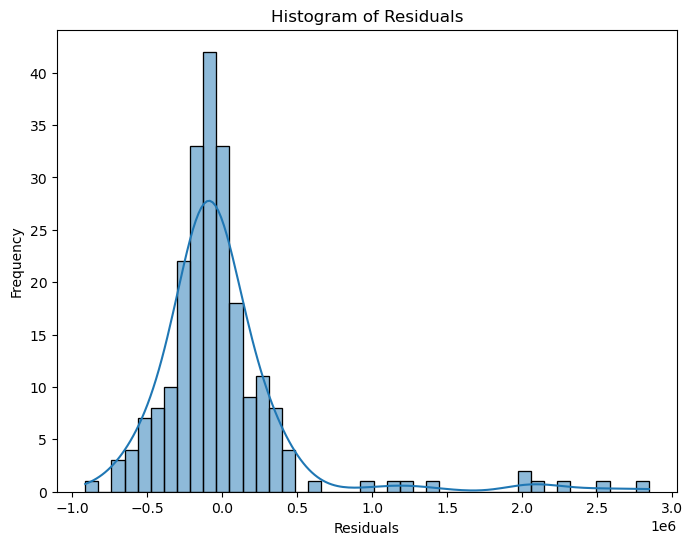

In [23]:
# Plot histogram residuals untuk memeriksa normalitas
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')


In [24]:
# Uji normalitas dengan Shapiro-Wilk
shapiro_stat, shapiro_p_value = stats.shapiro(residuals)

# Uji normalitas dengan Kolmogorov-Smirnov (KS) Test
ks_stat, ks_p_value = stats.kstest(residuals, 'norm')

# Menampilkan hasil uji dalam tabel
results = {
    "Test": ["Shapiro-Wilk", "Kolmogorov-Smirnov"],
    "Statistic": [shapiro_stat, ks_stat],
    "p-value": [shapiro_p_value, ks_p_value]
}

# Mengubah hasil uji menjadi DataFrame
results_df = pd.DataFrame(results)

# Menampilkan tabel hasil uji normalitas
print("\nHasil Uji Normalitas:")
print(results_df)


Hasil Uji Normalitas:
                 Test  Statistic       p-value
0        Shapiro-Wilk   0.685408  3.276386e-20
1  Kolmogorov-Smirnov   0.651786  1.426217e-93


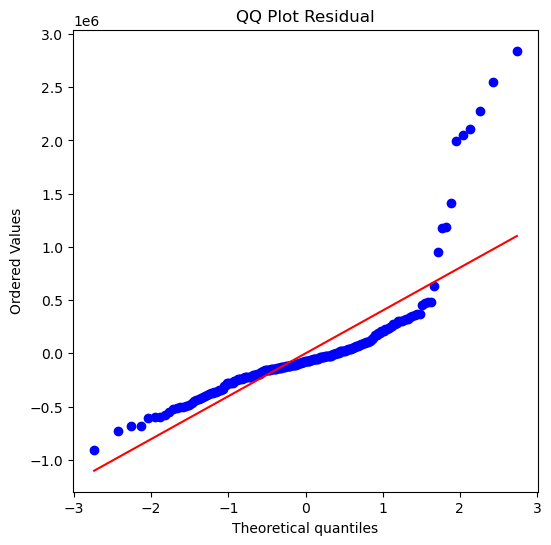

In [25]:
# Membuat QQ plot untuk residual
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot Residual')
plt.show()